# ***``Image Processing with Python``***

#### ***Import required libraries***

In [1]:
import skimage

#### ***Child Attributes of skimage***

In [2]:
dir(skimage)

['_INPLACE_MSG',
 '_STANDARD_MSG',
 '__SKIMAGE_SETUP__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_raise_build_error',
 '_shared',
 'color',
 'data',
 'data_dir',
 'draw',
 'dtype_limits',
 'ensure_python_version',
 'exposure',
 'external',
 'filters',
 'img_as_bool',
 'img_as_float',
 'img_as_float32',
 'img_as_float64',
 'img_as_int',
 'img_as_ubyte',
 'img_as_uint',
 'io',
 'lookfor',
 'measure',
 'restoration',
 'transform',
 'util']

In [3]:
from skimage import io

In [4]:
dir(io)

['ImageCollection',
 'MultiImage',
 'WRAP_LEN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_format_plugin_info_table',
 '_image_stack',
 '_io',
 '_plugins',
 '_separator',
 '_update_doc',
 'available_plugins',
 'call_plugin',
 'collection',
 'concatenate_images',
 'find_available_plugins',
 'image_stack',
 'imread',
 'imread_collection',
 'imread_collection_wrapper',
 'imsave',
 'imshow',
 'imshow_collection',
 'load_sift',
 'load_surf',
 'manage_plugins',
 'plugin_info',
 'plugin_order',
 'pop',
 'push',
 'reset_plugins',
 'show',
 'sift',
 'use_plugin',
 'util']

#### ***Import Packages***

In [5]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

from skimage import io

%matplotlib inline

#### ***Display an image using scikit-image***

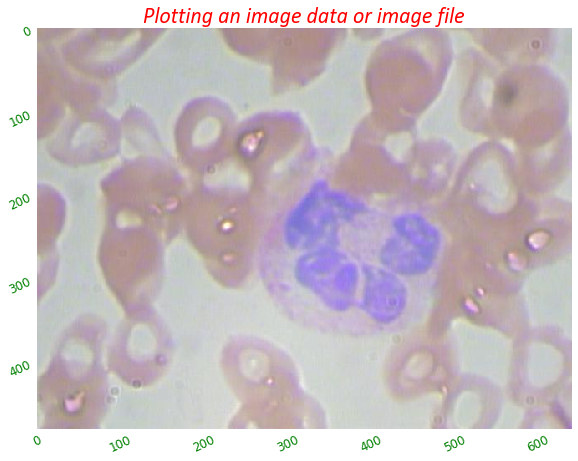

In [6]:
with plt.style.context('seaborn-dark'):
    plt.figure(figsize=(8,8))
    io.imshow('dataset-master/JPEGImages/BloodImage_00000.jpg')
    plt.xticks(rotation=25,size=12,color='g')
    plt.yticks(rotation=25,size=12,color='g')
    plt.title('Plotting an image data or image file',fontdict={'size':22,'color':'red','family':'calibri','style':'italic'})
plt.show()

#### ***Reading and Printing an image using scikit-image***

In [7]:
blood_image = io.imread('dataset-master/JPEGImages/BloodImage_00000.jpg')

##### ***Dtype of above readed image***

In [8]:
blood_image.dtype

dtype('uint8')

##### **uint8 stands for 2^8 = 256 which means 0-255 values. This tells us that every pixel value can be from 0 to 255.**

##### ***Shape of above readed image***

In [9]:
blood_image.shape

(480, 640, 3)

##### ***Dimension of above readed image***

In [10]:
blood_image.ndim

3

##### **Shape (480,640,3) means that there are 480 blocks of data each having 640 rows and 3 columns. 3 columns represents the RED, GREEN and BLUE color values.**
- **As, colors are represented by using integers or numbers and the mixture of R,G and B forms other colors.**

##### ***Some operations on image object***

In [26]:
blood_image[0]

Array([[176, 154, 143],
       [176, 154, 143],
       [176, 153, 145],
       ...,
       [190, 197, 203],
       [188, 195, 201],
       [186, 193, 199]], dtype=uint8)

In [12]:
blood_image[0].shape

(640, 3)

##### ***RGB values on first pixel***

In [13]:
blood_image[0][0]

Array([176, 154, 143], dtype=uint8)

##### ***RGB values on second pixel***

In [14]:
blood_image[0][1]

Array([176, 154, 143], dtype=uint8)

##### ***RGB values on third pixel***

In [15]:
blood_image[0][2]

Array([176, 153, 145], dtype=uint8)

##### ***RGB values on fourth pixel***

In [16]:
blood_image[0][3]

Array([176, 153, 145], dtype=uint8)

##### ***RGB values of first 5 pixels***

In [17]:
blood_image[0][0:4]

Array([[176, 154, 143],
       [176, 154, 143],
       [176, 153, 145],
       [176, 153, 145]], dtype=uint8)

##### ***RGB values of last 5 pixels***

In [18]:
blood_image[479][635:640]

Array([[164, 127, 178],
       [163, 123, 183],
       [160, 120, 183],
       [163, 122, 190],
       [168, 127, 197]], dtype=uint8)

##### **``We can also confirm the values of the pixels by cross verifying the same using ImageJ tool.``**

In [24]:
blood_image[23][7]

Array([176, 161, 156], dtype=uint8)

In [20]:
want_error

NameError: name 'want_error' is not defined

# ***Import the required libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltools
import nibabel as nib

from nltools.data import Brain_Data
from nltools.datasets import fetch_localizer

%matplotlib inline

### ***What the NLTOOLS package contains?***

In [ ]:
dir(nltools.datasets)

### ***Download the dataset of 30 subjects***

In [ ]:
patient_ids = [f'S{x:02}' for x in np.arange(1,31)]

In [ ]:
f=fetch_localizer(subject_ids=patient_ids,get_anats=True,data_type='raw')

In [ ]:
print(f['description'].decode())

In [ ]:
f.functional

In [ ]:
f.structural

In [ ]:
ni_brain_data = f.ext_vars

In [ ]:
ni_brain_data.shape

In [ ]:
ni_brain_data.head()

## ***Load Brain Data***

In [ ]:
Brain_Data(f['functional'][0])

### ***Load Functional Image as NIB Instance***

In [ ]:
dat = nib.load(f['functional'][0][0])

In [ ]:
type(dat)

In [ ]:
dat.shape

### ***Squeeze the NIB instance of Brain Functional Image***

In [ ]:
dat.get_data().squeeze().shape

### ***Affine the NIB instance of Brain Functional Image*** 

In [ ]:
dat.affine

In [ ]:
dat_fixed = nib.Nifti1Image(dat.get_data().squeeze(),dat.affine)

In [ ]:
f['functional'][0][0]

In [ ]:
nib.save(dat_fixed,f['functional'][0][0])

In [ ]:
Brain_Data(f['functional'][0])

### ***Apply the above fix on all the Subjects images***

In [ ]:
for filename in f['functional']:
    print(filename[0])
    dat = nib.load(filename[0])
    if len(dat.shape) > 4:
        dat_fixed = nib.Nifti1Image(dat.get_data().squeeze(),dat.affine)
        nib.save(dat_fixed,filename[0])

## ***Plot the Nifti image***

In [ ]:
s01_data = nib.load('C:\\Users\\NEW\\nilearn_data\\brainomics_localizer\\brainomics_data\\S01\\raw_T1_raw_anat_defaced.nii.gz')

In [ ]:
s01_data.get_data().shape

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(s01_data.get_data()[:,:,50])

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,20))

ax[0].imshow(s01_data.get_data()[:,:,1])
ax[0].set_title("Slice 1")

# Increasing the values of Xticks by 10 and Rotating it by 45 Degrees
ax[0].set_xticklabels((val + 10) for val in ax[0].get_xticks())
[tick.set_rotation(45) for tick in ax[0].get_xticklabels()]

# Increasing the values of Yticks by 10 and Rotating it by 45 Degrees
ax[0].set_yticklabels((val+10) for val in ax[0].get_yticks())
[tick.set_rotation(45) for tick in ax[0].get_yticklabels()]

ax[1].imshow(s01_data.get_data()[:,:,50])
ax[1].set_title("Slice 50")

# Increasing the values of Xticks by 15 and Rotating it by 45 Degrees
ax[1].set_xticklabels((val+15)for val in ax[1].get_xticks())
[tick.set_rotation(45) for tick in ax[1].get_xticklabels()]

# Increasing the values of Yticks by 15 and Rotating it by 45 Degrees
ax[1].set_yticklabels((val+15)for val in ax[1].get_yticks())
[tick.set_rotation(45) for tick in ax[1].get_yticklabels()]

ax[2].imshow(s01_data.get_data()[:,:,30])
ax[2].set_title("Slice 30")

# Increasing the values of Xticks by 15 and Rotating it by 45 Degrees
ax[2].set_xticklabels((val+15)for val in ax[2].get_xticks())
[tick.set_rotation(45) for tick in ax[2].get_xticklabels()]

# Increasing the values of Yticks by 15 and Rotating it by 45 Degrees
ax[2].set_yticklabels((val+15)for val in ax[2].get_yticks())
[tick.set_rotation(45) for tick in ax[2].get_yticklabels()]

In [ ]:
print(s01_data.header)

In [ ]:
s01_data.affine